# 🚀 Stochastic Gradient Descent

##Pytroch Vs Fastai

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

### 📚 Loading the MNIST Dataset, we load the MNIST dataset using torchvision. We apply a simple transformation to convert images into tensors.

In [14]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

### 🧠 Defining the Simple Neural Network We define a simple neural network model using PyTorch's `nn.Module`. It contains a Flatten layer, two Linear layers, and a ReLU activation in between

In [15]:
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
    self.fc = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 10)
    )

    def forward(self, x):
      return self.fc(x)

model = SimpleNN()

### 🎯 Setting up the Loss Function and Optimizer We use CrossEntropyLoss, a standard loss for classification, and SGD (Stochastic Gradient Descent) as the optimizer.

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

### 🔥 PyTorch Training Loop Here, we train the model manually over epochs, updating weights using backpropagation.

In [22]:
train_losses = []
train_accuracies = []

for epoch in range(5):
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(train_loader)
    accuracy = 100 * correct / total

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')


Epoch 1, Loss: 0.0726, Accuracy: 97.93%
Epoch 2, Loss: 0.0659, Accuracy: 98.16%
Epoch 3, Loss: 0.0597, Accuracy: 98.31%
Epoch 4, Loss: 0.0543, Accuracy: 98.52%
Epoch 5, Loss: 0.0498, Accuracy: 98.63%


In [27]:
# Save model
torch.save(model.state_dict(), 'simple_nn_pytorch.pth')

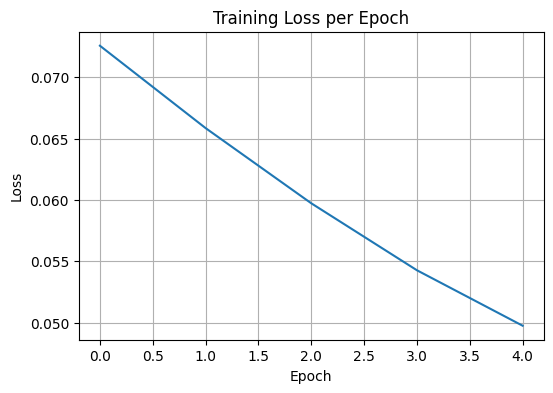

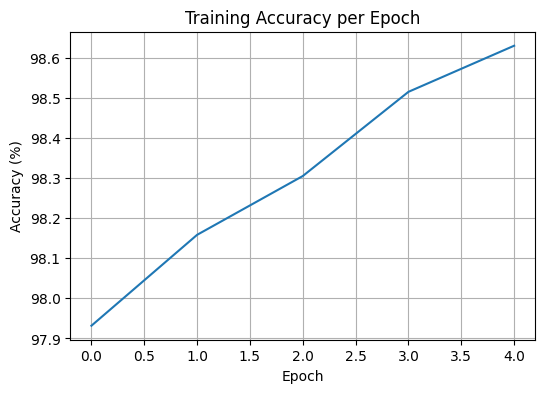

In [23]:
# Plot Loss
plt.figure(figsize=(6,4))
plt.plot(train_losses)
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(6,4))
plt.plot(train_accuracies)
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()


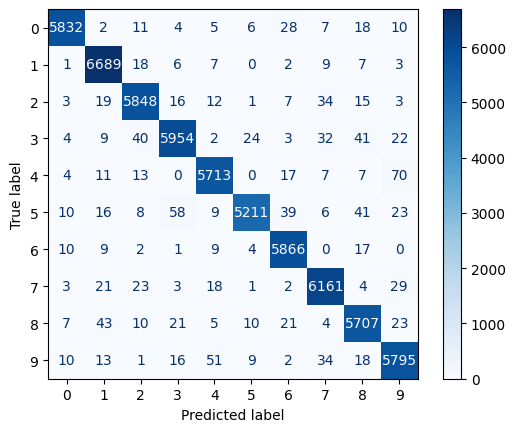

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in train_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.append(preds)
        all_labels.append(labels)

# Flatten lists
all_preds = torch.cat(all_preds).cpu().numpy()
all_labels = torch.cat(all_labels).cpu().numpy()

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


### 📚 Loading MNIST Sample Dataset in FastAI FastAI provides easy access to datasets like MNIST_SAMPLE. We download and untar the dataset

### 🛠 Creating a Custom DataBlock We define a custom DataBlock for FastAI to handle data processing like resizing, converting to grayscale, and splitting into training/validation sets

### 🚀 Training using FastAI's 1-Cycle Policy We train the model using the powerful 1-cycle learning rate policy which helps faster convergence

## Fastai

epoch,train_loss,valid_loss,accuracy,time
0,0.181127,0.104388,0.966634,00:15
1,0.067303,0.070356,0.973994,00:15
2,0.047193,0.061505,0.978410,00:15
3,0.044938,0.060086,0.978901,00:14
4,0.044535,0.059748,0.978901,00:14


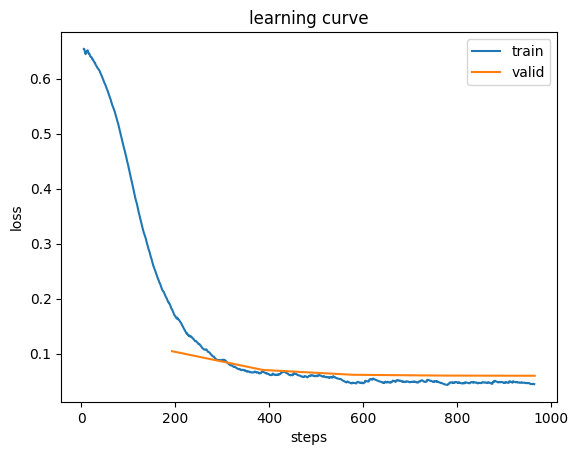

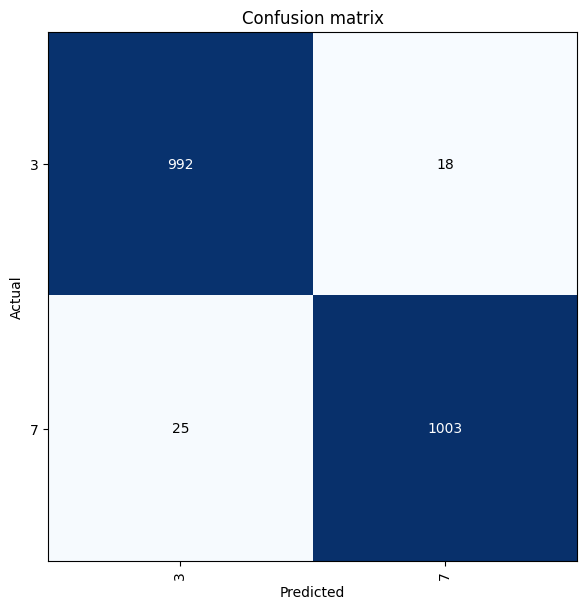

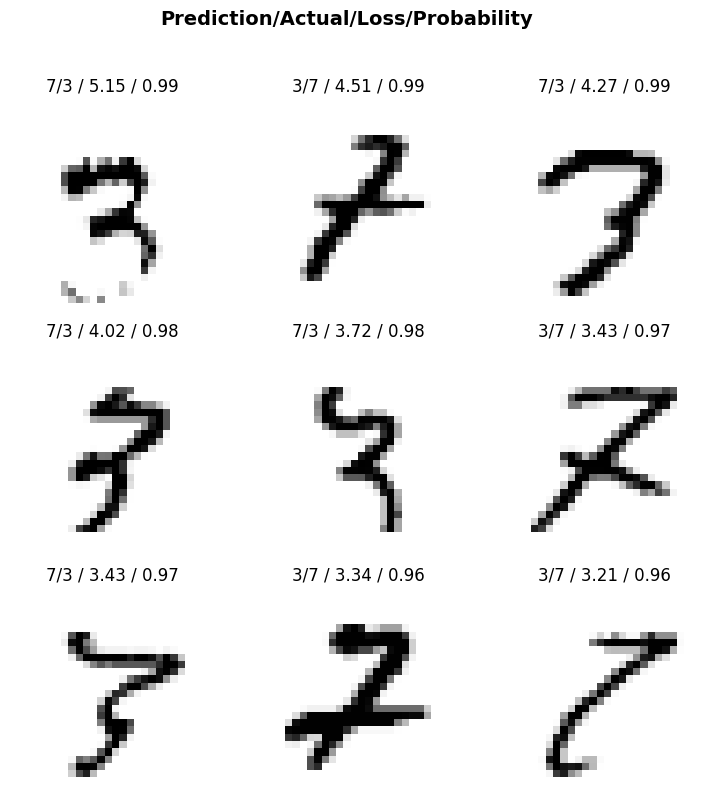

In [25]:
from fastai.vision.all import *

path = untar_data(URLs.MNIST_SAMPLE)

mnist_block = DataBlock(blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
                        get_items=get_image_files,
                        splitter=GrandparentSplitter(train_name='train',valid_name='valid'),
                        get_y=parent_label,
                        item_tfms=Resize(28),
                        batch_tfms=Normalize()
                        )

dls = mnist_block.dataloaders(path,bs=64)

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 2)  # 2 classes (3 and 7)
        )

    def forward(self, x):
        return self.fc(x)

model = SimpleNN()

learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), opt_func=SGD, metrics=accuracy)


learn.fit_one_cycle(5, 1e-2)


learn.recorder.plot_loss()
plt.show()


# Confusion Matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6))
plt.show()

# Top Losses
interp.plot_top_losses(9, nrows=3)
plt.show()


In [28]:
# Save model
learn.save('simple_nn_fastai')
learn.export('simple_nn_fastai.pkl')